### Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from tqdm import tqdm
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('/content/Epileptic Seizure Recognition.csv',index_col=0)
df.head()

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  \
Unnamed                                                       ...               
X21.V1.791  135  190  229  223  192  125   55   -9  -33  -38  ...   -17   -15   
X15.V1.924  386  382  356  331  320  315  307  272  244  232  ...   164   150   
X8.V1.1     -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    57    64   
X16.V1.60  -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -82   -81   
X20.V1.54    -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...     4     2   

            X172  X173  X174  X175  X176  X177  X178  y  
Unnamed                                                  
X21.V1.791   -31   -77  -103  -127  -116   -83   -51  4  
X15.V1.924   146   152   157   156   154   143   129  1  
X8.V1.1       48    19   -12   -30   -35   -35   -36  5  
X16.V1.60    -80   -77   -85   -77   -72   -69   -65  5  
X20.V1.54    -12   -32   -41   -65   -83   -89   -73  5  

[5 rows x 179 columns]

In [3]:
def get_single(a):
    data = []
    for i in range(1,24):
        s = 'X'+str(i)+'.V1.'+str(a)
        if df[s == df.index].empty == False:
            data = np.concatenate((data,df[s == df.index].values[0]))
    return data

all_data = []
for i in tqdm(range(1,995)):
    data = get_single(i)
    if data != []:
        all_data.append(data)



  0%|          | 0/994 [00:00<?, ?it/s]<ipython-input-3-629bbd2176b7>:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if data != []:
100%|██████████| 994/994 [00:39<00:00, 24.95it/s]


In [4]:
print(len(all_data))

495


In [5]:
df_eeg = pd.DataFrame({'signal':all_data}, index=[i for i in range(1,496)])
df_eeg

signal
1    [-56.0, -50.0, -64.0, -91.0, -135.0, -140.0, -...
2    [-37.0, -22.0, -17.0, -24.0, -31.0, -20.0, -5....
3    [-31.0, -43.0, -39.0, -39.0, -9.0, -5.0, 18.0,...
4    [14.0, 26.0, 32.0, 25.0, 16.0, 8.0, 8.0, 12.0,...
5    [-87.0, -89.0, -73.0, -69.0, -51.0, -48.0, -51...
..                                                 ...
491  [-476.0, -518.0, -521.0, -362.0, -68.0, 175.0,...
492  [-18.0, -13.0, 0.0, 9.0, 6.0, -20.0, -67.0, -1...
493  [-62.0, -64.0, -62.0, -59.0, -57.0, -63.0, -67...
494  [-45.0, -53.0, -51.0, -52.0, -54.0, -53.0, -60...
495  [23.0, 144.0, 228.0, 260.0, 255.0, 218.0, 178....

[495 rows x 1 columns]

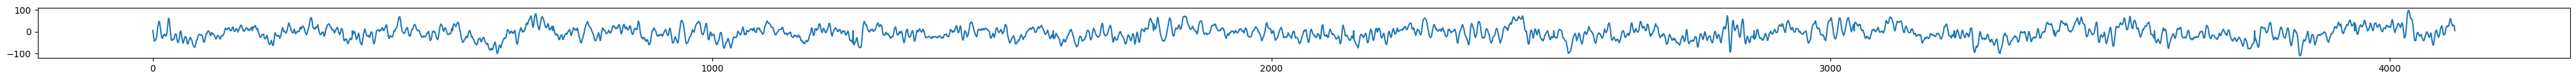

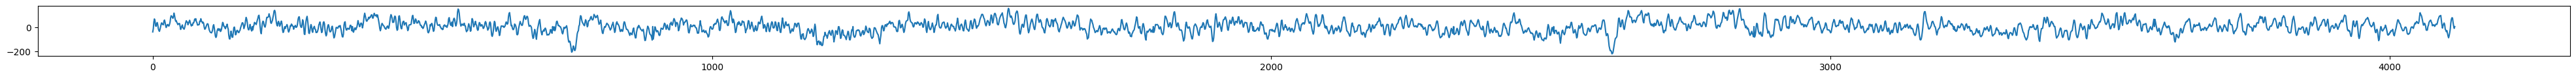

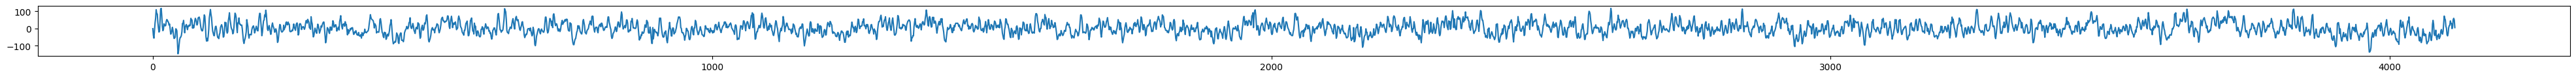

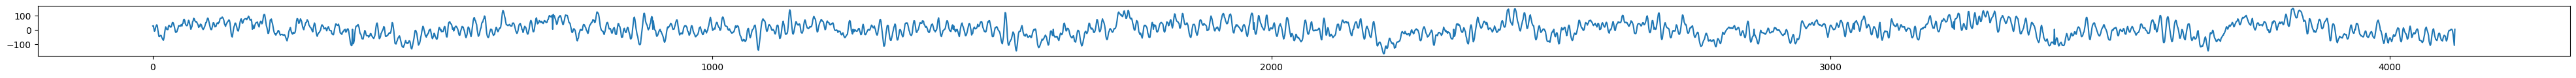

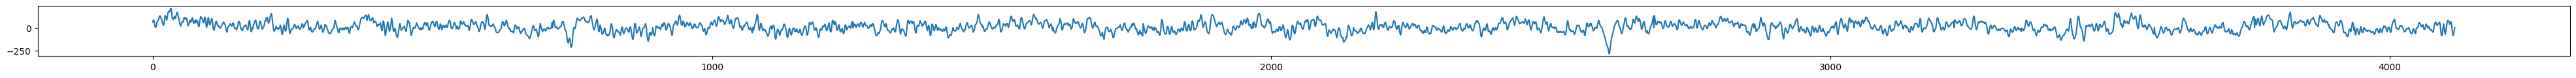

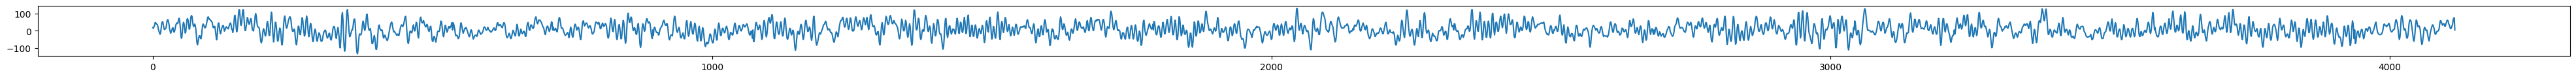

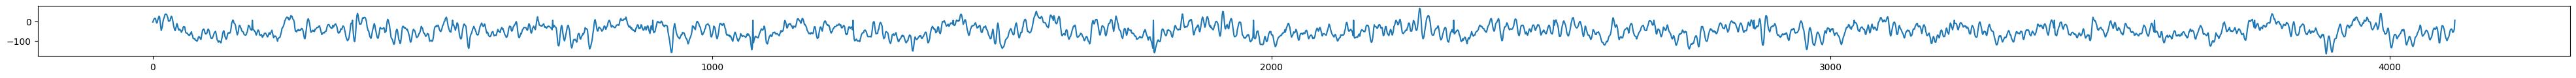

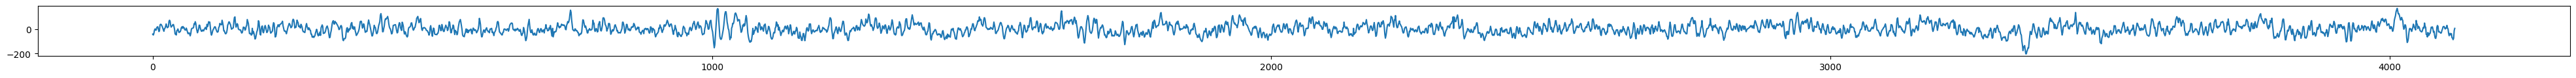

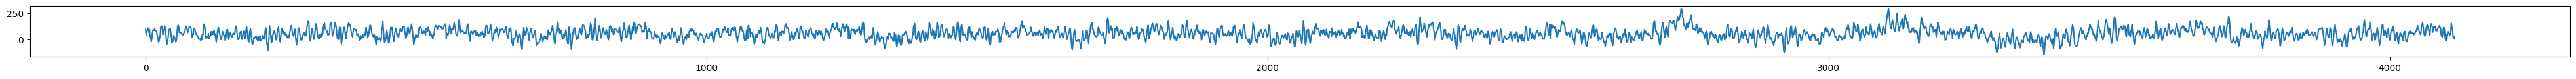

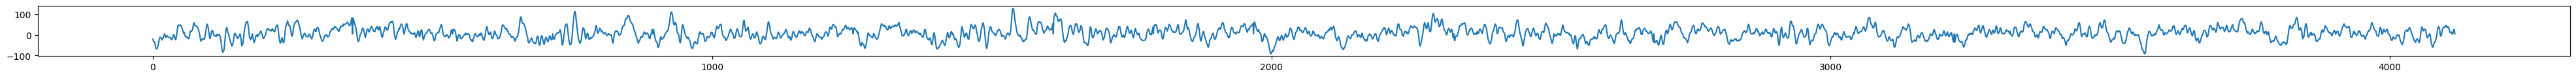

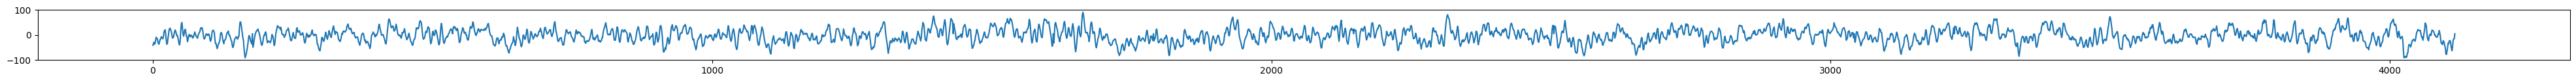

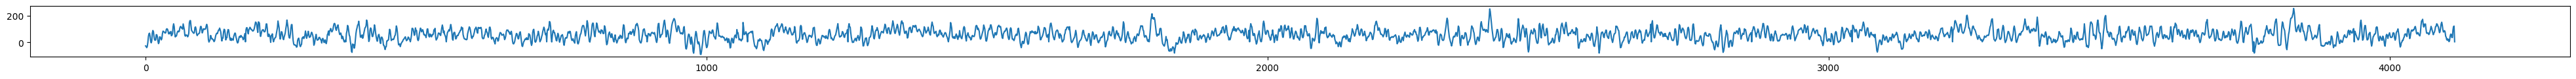

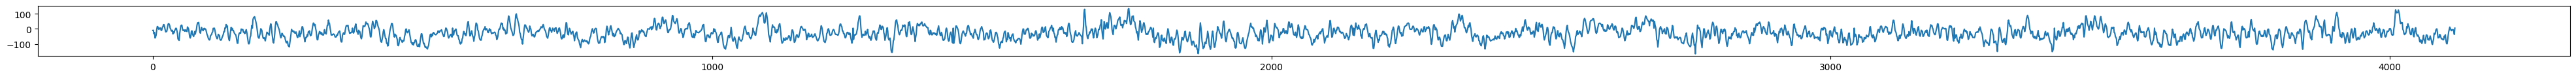

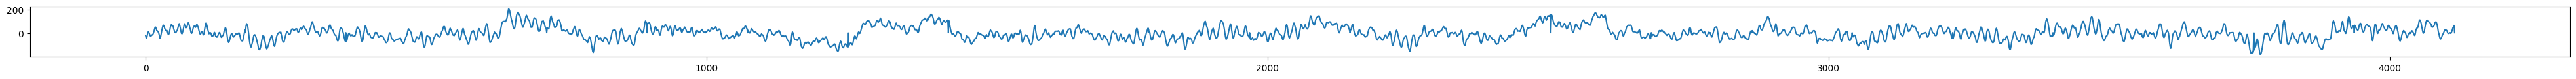

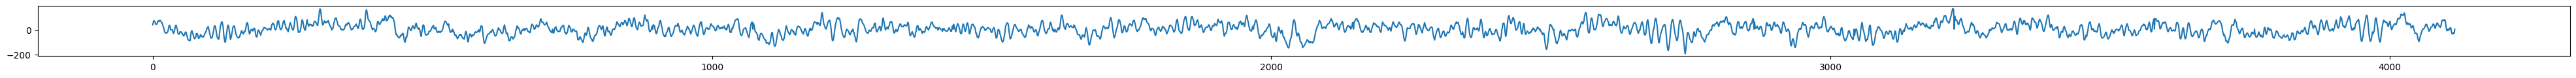

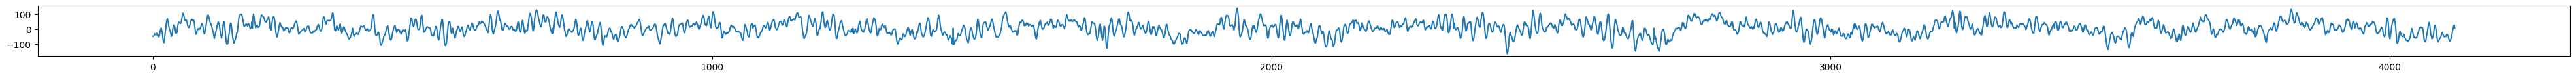

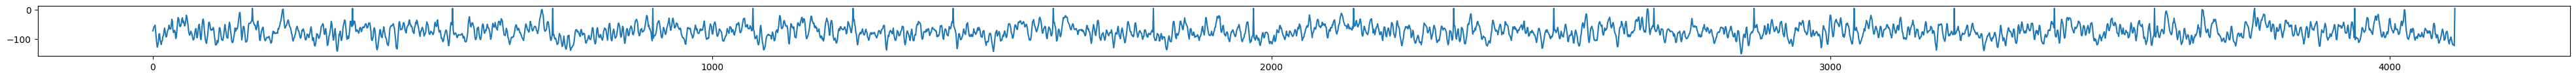

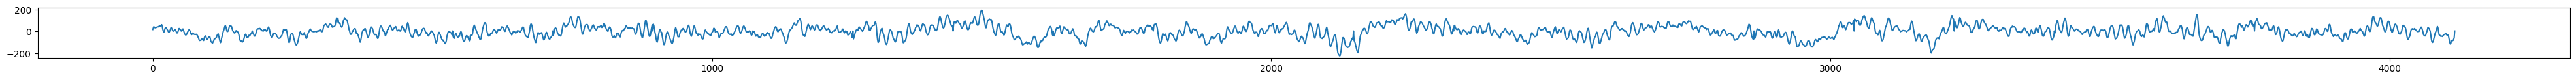

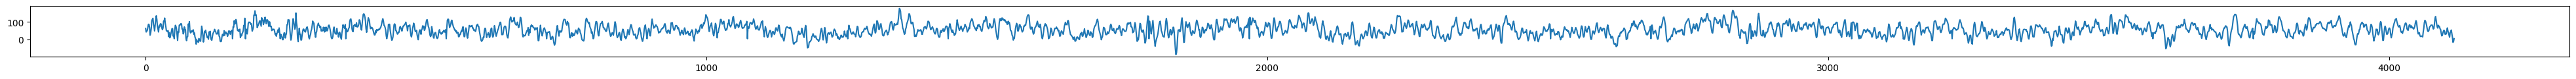

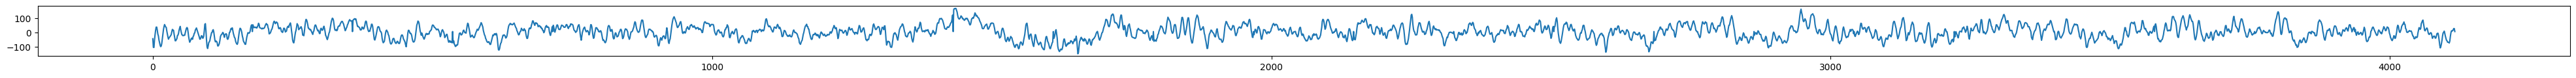

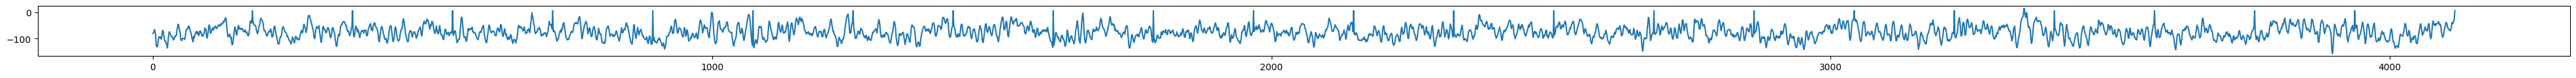

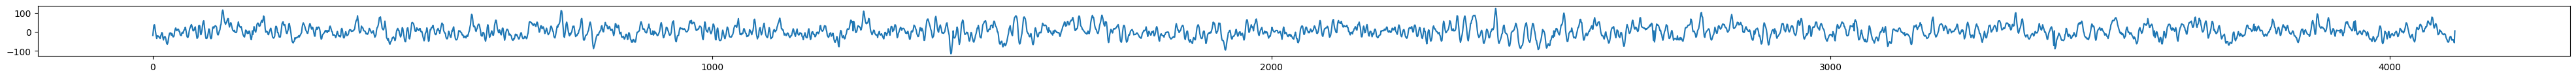

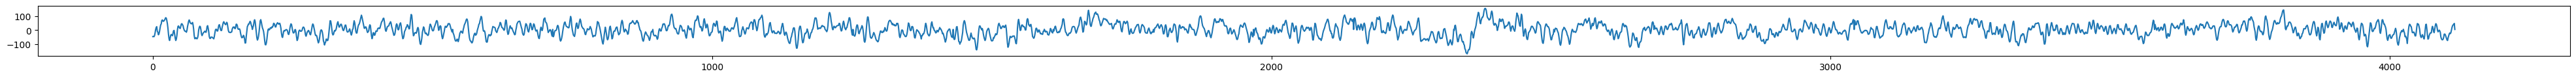

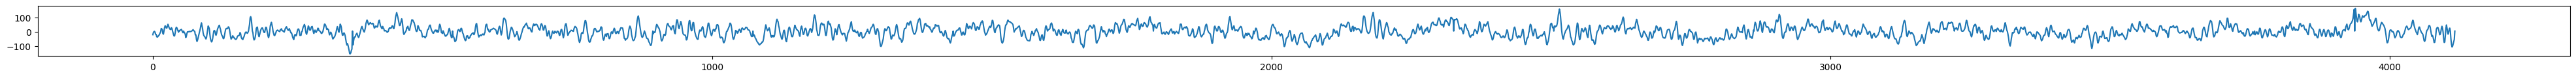

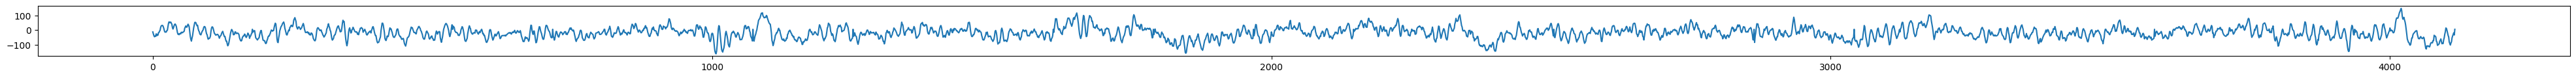

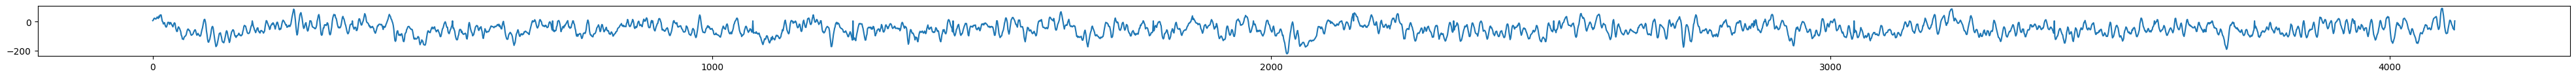

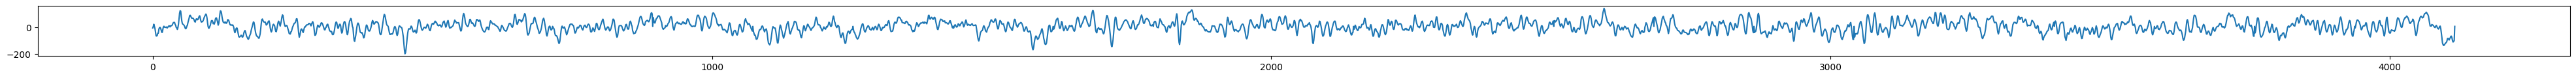

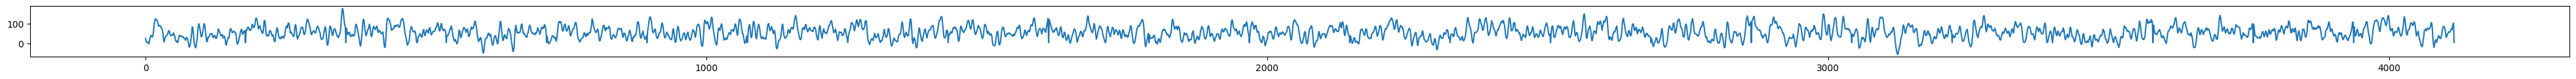

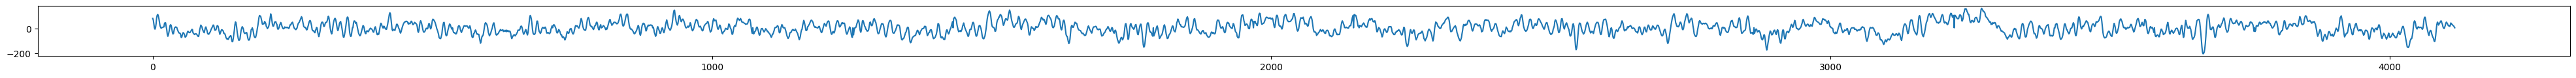

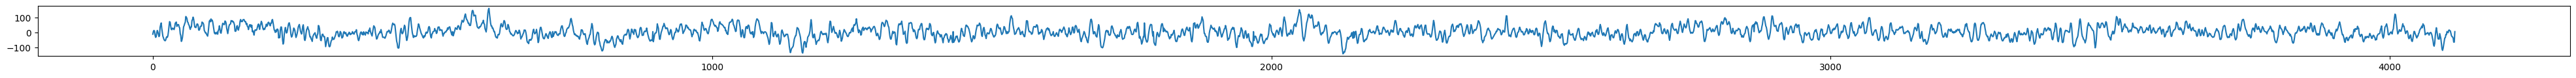

In [6]:
for i in range(20,50):
  plt.figure(figsize=(50,1))
  plt.plot(df_eeg.iloc[i].values[0])
  plt.show()

In [7]:
df_2=pd.read_csv('/content/Epileptic Seizure Recognition.csv')
df_2=df_2.drop(columns=df_2.columns[0])
df_2.head()

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  X172  \
0  135  190  229  223  192  125   55   -9  -33  -38  ...   -17   -15   -31   
1  386  382  356  331  320  315  307  272  244  232  ...   164   150   146   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    57    64    48   
3 -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -82   -81   -80   
4   -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...     4     2   -12   

   X173  X174  X175  X176  X177  X178  y  
0   -77  -103  -127  -116   -83   -51  4  
1   152   157   156   154   143   129  1  
2    19   -12   -30   -35   -35   -36  5  
3   -77   -85   -77   -72   -69   -65  5  
4   -32   -41   -65   -83   -89   -73  5  

[5 rows x 179 columns]

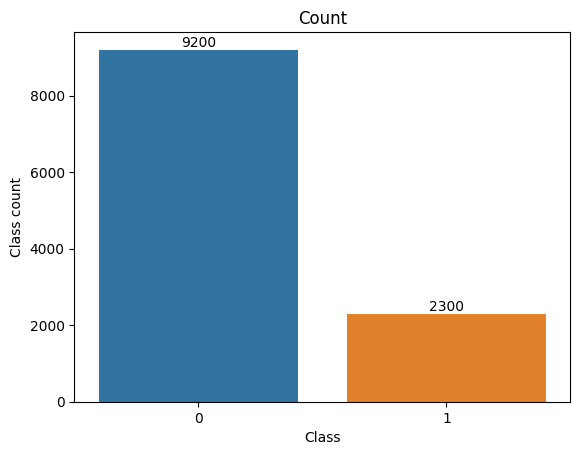

The number of trials for non-seizure class is 9200
The number of trials for seizure class is 2300


In [8]:
cols=df_2.columns # X values

df_2.loc[df_2['y'] > 1, 'y'] = 0  # y values over 1 is changed into 0

ax = sns.countplot(x='y', data=df_2)
# add label to the axis and label to the plot
ax.set(xlabel ="Class", ylabel = "Class count", title ='Count')
ax.bar_label(ax.containers[0])
plt.show()

non_seizure, seizure=df_2['y'].value_counts()
print('The number of trials for non-seizure class is', non_seizure)
print('The number of trials for seizure class is', seizure)

In [9]:
df_2.isnull().sum().sum()

0

In [10]:
Y=df_2.iloc[:,178].values
Y.shape

(11500,)

In [11]:
X=df_2.iloc[:,1:178].values
X.shape

(11500, 177)

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
from sklearn.svm import SVC

clf= SVC()
clf.fit(X_train, y_train)
y_pred_svc=clf.predict(X_test)
accuracy_svc=round(clf.score(X_train,y_train)*100,2)
print('Accuracy:', str(accuracy_svc) +'%')



Accuracy: 98.25%


Prediction check

In [15]:
i=5000
input_X=[df_2.iloc[i,:177]]
output_Y=[df_2.iloc[i,178]]

new_output=clf.predict(input_X)
new_output

if new_output==[1]:
  print("Get seizure")
else:
  print('Dont worry')

Get seizure


In [16]:
import pickle
# save to the pickle file
with open('svc_eeg.pkl', 'wb') as f:
    pickle.dump(clf, f)

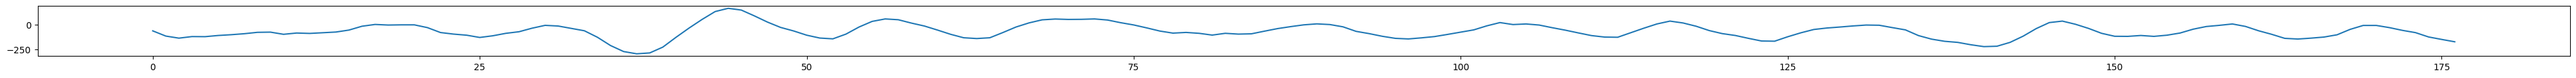

In [17]:
plt.figure(figsize=(50,1))
plt.plot(df_2.iloc[i,:177].values)
plt.show()